In [1]:
import pandas as pd
peakinf = []

In [2]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

In [ ]:
df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANCDRdata.csv')

In [2]:
df = pd.read_csv('/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

In [3]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

dfDate = pd.DataFrame(df1)
dfDate

,0
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
5,1/27/20
6,1/28/20
7,1/29/20
8,1/30/20
9,1/31/20


In [4]:
China = df[df["Country/Region"] == "China"]  
China
dChina = China.groupby("Last Update")
dChina = dChina.sum()
dChina
dChina = list(dChina["Confirmed"].values)
dChina.sort()
dChina

ChinaCases = pd.DataFrame({"China": dChina})

ChinaCases
ChinaCases = pd.concat([dfDate,ChinaCases], axis=1, sort = False)
ChinaCases
ChinaCases = ChinaCases.rename(columns={0: "Date"})
ChinaCases

,Date,China
0,1/22/20,547
1,1/23/20,639
2,1/24/20,916
3,1/25/20,1399
4,1/26/20,2062
5,1/27/20,2863
6,1/28/20,5494
7,1/29/20,6070
8,1/30/20,8124
9,1/31/20,9783


In [5]:
FMT = '%m/%d/%y'
days = ChinaCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday
#ChinaCases['Date'] = days.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT)).days  )

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68]

In [6]:
import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

4.366066247502727
18.33796272000131
77697.25182119591
Day of Inflection: 2020-02-09 00:00:00
End of the Infection: 2020-04-03 00:00:00


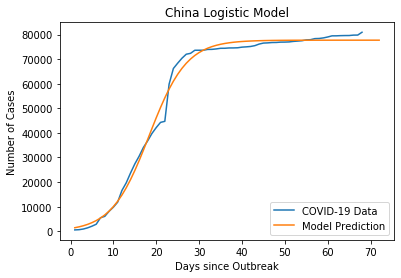

In [7]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math
Day = numday
Cases = list(ChinaCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("China Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [8]:
import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

Day of Inflection: 2020-02-09 00:00:00


In [9]:
sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

End of the Infection: 2020-04-03 00:00:00


In [10]:
df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))


SK = df[df["Country/Region"] == "South Korea"]  
SK
dSK = list(SK["Confirmed"].values)
dSK.sort()
length = len(dSK)

dfDate = pd.DataFrame(df1[0:length])
dfDate

SKCases = pd.DataFrame({"South Korea": dSK})

SKCases
SKCases = pd.concat([dfDate,SKCases], axis=1, sort = False)
SKCases
SKCases = SKCases.rename(columns={0: "Date"})
SKCases

FMT = '%m/%d/%y'
days = SKCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

FileNotFoundError: [Errno 2] File b'C:\\Users\\austi\\Documents\\GitHub\\COMP5360Project\\project_files\\csv_files\\CLEANCDRdata.csv' does not exist: b'C:\\Users\\austi\\Documents\\GitHub\\COMP5360Project\\project_files\\csv_files\\CLEANCDRdata.csv'

In [11]:
Day = numday
Cases = list(SKCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")

plt.title("South Korea Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

NameError: name 'SKCases' is not defined

In [12]:
import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

Day of Inflection: 2020-02-09 00:00:00
End of the Infection: 2020-04-03 00:00:00


In [13]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

USA = df[df["Country/Region"] == "US"]  
USA
dUS = USA.groupby("Last Update")
dUS = dUS.sum()
dUS

dUS = list(dUS["Confirmed"].values)
dUS.sort()
dUS

length = len(dUS)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

USCases = pd.DataFrame({"US": dUS})
USCases
USCases = pd.concat([dfDate,USCases], axis=1, sort = False)
USCases
USCases = USCases.rename(columns={0: "Date"})
USCases

FMT = '%m/%d/%y'
days = USCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52]

3.212214164659385
51.135785165837234
247793.97038914467
Day of Inflection: 2020-03-28 00:00:00
End of the Infection: 2020-04-21 00:00:00


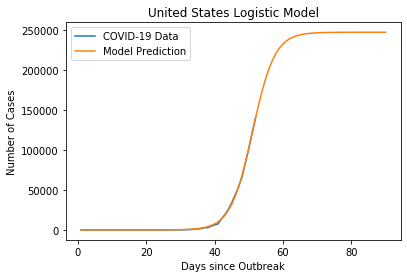

In [14]:
Day = numday
Cases = list(USCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("United States Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

ITA = df[df["Country/Region"] == "Italy"]  
dItaly = ITA.groupby("Last Update")
dItaly = dItaly.sum()
dItaly

dItaly = list(dItaly["Confirmed"].values)
dItaly.sort()
dItaly

length = len(dItaly)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

ITACases = pd.DataFrame({"Italy": dItaly})
ITACases
ITACases = pd.concat([dfDate,ITACases], axis=1, sort = False)
ITACases
ITACases = ITACases.rename(columns={0: "Date"})
ITACases

FMT = '%m/%d/%y'
days = ITACases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

In [ ]:
Day = numday
Cases = list(ITACases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Italy Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

UK = df[df["Country/Region"] == "United Kingdom"]  
dUK = UK.groupby("Last Update")
dUK = dUK.sum()
dUK

dUK = list(dUK["Confirmed"].values)
dUK.sort()
dUK

length = len(dUK)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

UKCases = pd.DataFrame({"United Kingdom": dUK})
UKCases
UKCases = pd.concat([dfDate,UKCases], axis=1, sort = False)
UKCases
UKCases = UKCases.rename(columns={0: "Date"})
UKCases

FMT = '%m/%d/%y'
days = UKCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(UKCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol


enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("United Kingdom Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

NZ = df[df["Country/Region"] == "New Zealand"]  
dNZ = NZ.groupby("Last Update")
dNZ = dNZ.sum()
dNZ

dNZ = list(dNZ["Confirmed"].values)
dNZ.sort()
dNZ

length = len(dNZ)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

NZCases = pd.DataFrame({"New Zealand": dNZ})
NZCases
NZCases = pd.concat([dfDate,NZCases], axis=1, sort = False)
NZCases
NZCases = NZCases.rename(columns={0: "Date"})
NZCases

FMT = '%m/%d/%y'
days = NZCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(NZCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol


enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("New Zealand Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

IR = df[df["Country/Region"] == "Iran"]  
dIR = IR.groupby("Last Update")
dIR = dIR.sum()
dIR

dIR = list(dIR["Confirmed"].values)
dIR.sort()
dIR

length = len(dIR)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

IRCases = pd.DataFrame({"Iran": dIR})
IRCases
IRCases = pd.concat([dfDate,IRCases], axis=1, sort = False)
IRCases
IRCases = IRCases.rename(columns={0: "Date"})
IRCases

FMT = '%m/%d/%y'
days = IRCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(IRCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Iran Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

AU = df[df["Country/Region"] == "Australia"]  
dAU = AU.groupby("Last Update")
dAU = dAU.sum()
dAU

dAU = list(dAU["Confirmed"].values)
dAU.sort()
dAU

length = len(dAU)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

AUCases = pd.DataFrame({"Australia": dAU})
AUCases
AUCases = pd.concat([dfDate,AUCases], axis=1, sort = False)
AUCases
AUCases = AUCases.rename(columns={0: "Date"})
AUCases

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

AU = df[df["Country/Region"] == "Australia"]  
dAU = AU.groupby("Last Update")
dAU = dAU.sum()
dAU

dAU = list(dAU["Confirmed"].values)
dAU.sort()
dAU

length = len(dAU)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

AUCases = pd.DataFrame({"Australia": dAU})
AUCases
AUCases = pd.concat([dfDate,AUCases], axis=1, sort = False)
AUCases
AUCases = AUCases.rename(columns={0: "Date"})
AUCases

FMT = '%m/%d/%y'
days = AUCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(AUCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Australia Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

IN = df[df["Country/Region"] == "India"]  
dIN = IN.groupby("Last Update")
dIN = dIN.sum()
dIN

dIN = list(dIN["Confirmed"].values)
dIN.sort()
dIN
length = len(dIN)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

INCases = pd.DataFrame({"India": dIN})
INCases
INCases = pd.concat([dfDate,INCases], axis=1, sort = False)
INCases
INCases = INCases.rename(columns={0: "Date"})
INCases

FMT = '%m/%d/%y'
days = INCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(INCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("India Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

PR = df[df["Country/Region"] == "Peru"]  
dPR = PR.groupby("Last Update")
dPR = dPR.sum()
dPR

dPR = list(dPR["Confirmed"].values)
dPR.sort()
dPR
length = len(dPR)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

PRCases = pd.DataFrame({"Peru": dPR})
PRCases
PRCases = pd.concat([dfDate,PRCases], axis=1, sort = False)
PRCases
PRCases = PRCases.rename(columns={0: "Date"})
PRCases

FMT = '%m/%d/%y'
days = PRCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(PRCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Peru Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [27]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/usaCLEANCDRdata.csv')
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math

In [37]:
stateinf = []

4.393808097091883
44.62039716125996
145240.2291664302
Day of Inflection: 2020-04-12 00:00:00
End of the Infection: 2020-06-09 00:00:00


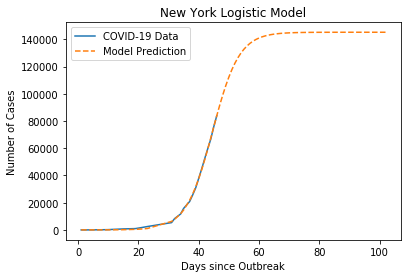

In [36]:
#new york, utah, cali, washington, illinois, florida, SD, idaho, SC
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
df
NY = df[df["Province/State"] == 'NY']
dNY = NY.groupby("Last Update")
dNY = dNY.sum()
dNY = list(dNY["Confirmed"].values)
dNY
length = len(dNY)
dfDate = pd.DataFrame(Dates[0:length])
dfDate

NYCases = pd.DataFrame({"New York": dNY})
NYCases
NYCases = pd.concat([dfDate,NYCases], axis=1, sort = False)
NYCases
NYCases = NYCases.rename(columns={0: "Date"})
NYCases

FMT = '%m/%d/%Y'
days = NYCases['Date']
numday = []

from datetime import datetime 
for a in days:
#    x = a
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(NYCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

stateinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("New York Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

Day of Inflection: 2020-04-10 00:00:00
End of the Infection: 2020-06-19 00:00:00


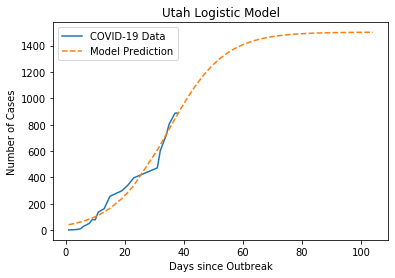

In [39]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
UT = df[df["Province/State"] == 'UT']
dUT = UT.groupby("Last Update")
dUT = dUT.sum()
dUT = list(dUT["Confirmed"].values)

length = len(dUT)
dfDate = pd.DataFrame(Dates[0:length])

UTCases = pd.DataFrame({"Utah": dUT})
UTCases = pd.concat([dfDate,UTCases], axis=1, sort = False)
UTCases = UTCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = UTCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(UTCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

stateinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Utah Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

Day of Inflection: 2020-04-19 00:00:00
End of the Infection: 2020-06-18 00:00:00


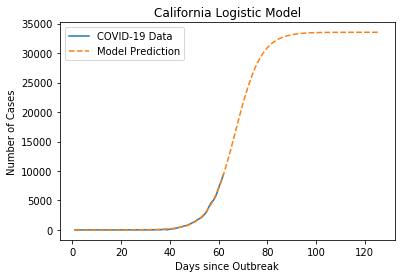

In [40]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
CA = df[df["Province/State"] == 'CA']
dCA = CA.groupby("Last Update")
dCA = dCA.sum()
dCA = list(dCA["Confirmed"].values)

length = len(dCA)
dfDate = pd.DataFrame(Dates[0:length])

CACases = pd.DataFrame({"California": dCA})
CACases = pd.concat([dfDate,CACases], axis=1, sort = False)
CACases = CACases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = CACases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(CACases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

stateinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("California Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

Day of Inflection: 2020-04-15 00:00:00
End of the Infection: 2020-06-21 00:00:00


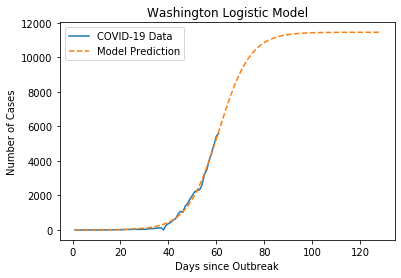

In [41]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
WA = df[df["Province/State"] == 'WA']
dWA = WA.groupby("Last Update")
dWA = dWA.sum()
dWA = list(dWA["Confirmed"].values)

length = len(dWA)
dfDate = pd.DataFrame(Dates[0:length])

WACases = pd.DataFrame({"Washington": dWA})
WACases = pd.concat([dfDate,WACases], axis=1, sort = False)
WACases = WACases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = WACases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(WACases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

stateinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Washington Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

Day of Inflection: 2020-04-11 00:00:00
End of the Infection: 2020-05-13 00:00:00


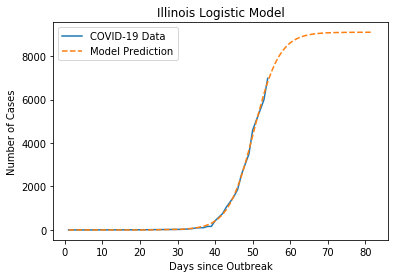

In [42]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
IL = df[df["Province/State"] == 'IL']
dIL = IL.groupby("Last Update")
dIL = dIL.sum()
dIL = list(dIL["Confirmed"].values)

length = len(dIL)
dfDate = pd.DataFrame(Dates[0:length])

ILCases = pd.DataFrame({"Illinois": dIL})
ILCases = pd.concat([dfDate,ILCases], axis=1, sort = False)
ILCases = ILCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = ILCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(ILCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

stateinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Illinois Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

Day of Inflection: 2020-04-21 00:00:00
End of the Infection: 2020-06-22 00:00:00


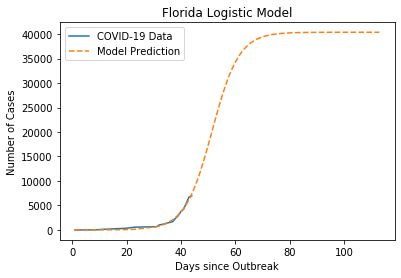

In [44]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
FL = df[df["Province/State"] == 'FL']
dFL = FL.groupby("Last Update")
dFL = dFL.sum()
dFL = list(dFL["Confirmed"].values)

length = len(dFL)
dfDate = pd.DataFrame(Dates[0:length])

FLCases = pd.DataFrame({"Florida": dFL})
FLCases = pd.concat([dfDate,FLCases], axis=1, sort = False)
FLCases = FLCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = FLCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(FLCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

stateinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Florida Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

Day of Inflection: 2020-03-26 00:00:00
End of the Infection: 2020-05-16 00:00:00


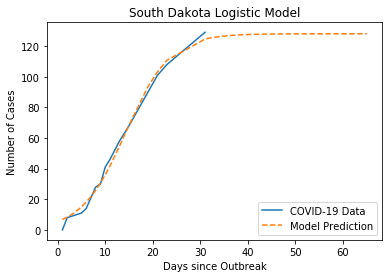

In [45]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
SD = df[df["Province/State"] == 'SD']
dSD = SD.groupby("Last Update")
dSD = dSD.sum()
dSD = list(dSD["Confirmed"].values)

length = len(dSD)
dfDate = pd.DataFrame(Dates[0:length])

SDCases = pd.DataFrame({"South Dakota": dSD})
SDCases = pd.concat([dfDate,SDCases], axis=1, sort = False)
SDCases = SDCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = SDCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(SDCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

stateinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("South Dakota Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

Day of Inflection: 2020-04-04 00:00:00
End of the Infection: 2020-06-07 00:00:00


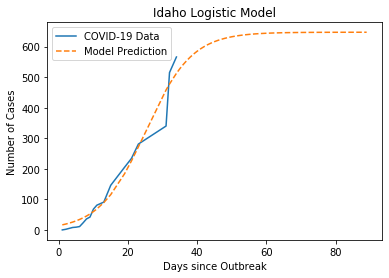

In [46]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
ID = df[df["Province/State"] == 'ID']
dID = ID.groupby("Last Update")
dID = dID.sum()
dID = list(dID["Confirmed"].values)

length = len(dID)
dfDate = pd.DataFrame(Dates[0:length])

IDCases = pd.DataFrame({"Idaho": dID})
IDCases = pd.concat([dfDate,IDCases], axis=1, sort = False)
IDCases = IDCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = IDCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(IDCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

stateinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Idaho Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

Day of Inflection: 2020-08-22 00:00:00
End of the Infection: 2021-04-13 00:00:00


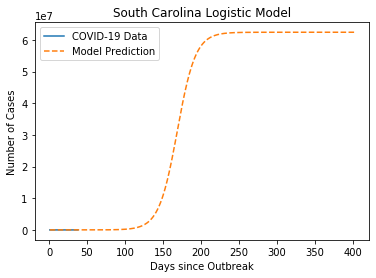

In [52]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
SC = df[df["Province/State"] == 'SC']
dSC = SC.groupby("Last Update")
dSC = dSC.sum()
dSC = list(dSC["Confirmed"].values)

length = len(dSC)
dfDate = pd.DataFrame(Dates[0:length])

SCCases = pd.DataFrame({"South Carolina": dSC})
SCCases = pd.concat([dfDate,SCCases], axis=1, sort = False)
SCCases = SCCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = SCCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(SCCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000], maxfev=10000)
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

stateinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("South Carolina Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [43]:
 from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

PR = df[df["Country/Region"] == "Peru"]  
dPR = PR.groupby("Last Update")
dPR = dPR.sum()
dPR

dPR = list(dPR["Confirmed"].values)
dPR.sort()
dPR
length = len(dPR)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

PRCases = pd.DataFrame({"Peru": dPR})
PRCases
PRCases = pd.concat([dfDate,PRCases], axis=1, sort = False)
PRCases
PRCases = PRCases.rename(columns={0: "Date"})
PRCases

FMT = '%m/%d/%y'
days = PRCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(PRCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Peru Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

ValueError: unconverted data remains: 20

In [ ]:
peakinf

In [ ]:
data = pd.DataFrame({"PeakInfections": peakinf})
country = ["China", "South Korea", "United States", "Italy", "United Kingdom", "New Zealand", "Iran", "Australia", "India", "Peru"]
cont = pd.DataFrame({"Country": country})
data = pd.concat([cont,data], axis=1, sort = False)
data=data.sort_values(['Country'])
data=data.reset_index(drop=True)
data

In [ ]:
df3 = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEAN_WorldHealthIndex.csv')
df4 = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\population_and_density_by_country.csv')

In [ ]:

countries = ['UnitedStatesofAmerica','Italy', 'China','UnitedKingdom','Iran,IslamicRepublicof',  'RepublicofKorea',   'Australia' , 'India','NewZealand', 'Peru']
countries2 = ['United States','Italy', 'China','United Kingdom','Iran',  'South Korea',   'Australia' , 'India','New Zealand', 'Peru']
df3 = df3.loc[df3['Member State'].isin(countries)]
df4 = df4.loc[df4['name'].isin(countries2)]
df3 = df3.sort_values(by=['Member State'])
df4 = df4.sort_values(by=['name'])
indexes = list(df3['Index'].values)
pop_density= list(df4["Density"].values)
population=list(df4['pop2019'].values)
index = pd.DataFrame({"WHOIndex": indexes})
pop_density = pd.DataFrame({"PopulationDensity": pop_density,'population':population})
data = pd.concat([data,index], axis=1, sort = False)
data = pd.concat([data,pop_density], axis=1, sort = False)
data

In [ ]:
correlation= data.corr()
plt.style.use('default')
Global_heatmap=plt.pcolor(correlation,vmin=-1,vmax=1,cmap=plt.cm.Reds)
plt.colorbar(Global_heatmap)
plt.xticks((range(4)),['Peak Infections','WHO Index', 'Population Dens.','population'])
plt.yticks((range(4)),['Peak Infections','WHO Index', 'Population Dens.','population'])           

In [ ]:
import seaborn as sns
sns.set()
sns.pairplot(data)#, hue="Language");

In [ ]:
import statsmodels.formula.api as sm
peak_infections_linear_regression = sm.ols(formula="PeakInfections~ WHOIndex+population", data=data).fit()
peak_infections_linear_regression.summary()

In [ ]:
#import numpy as np
#def GompertzModel(x,a,b,c):
#    return a*(np.exp(b*(np.exp(c*x))))
#
#from scipy.optimize import curve_fit
#from scipy.optimize import fsolve
#import matplotlib.pyplot as plt
#
#Day = numday
#Cases = list(ChinaCases.iloc[:,1])
#fit2 = curve_fit(GompertzModel,Day,Cases, p0=[77000, -20, 2],)
#
#params = fit2[0]
#
#a = params[0]
#b = params[1]
#c = params[2]
#
#print(a)
#print(b)
#print(c)
##Pred = LogisticModel(Day, *params)
##plt.plot(Day, Pred)
##plt.plot(Day, Cases)